In [2]:
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [3]:
# Read data
filename = 'Melatoninlevels.csv'
df = pd.read_csv(filename)
print df.head()

     ID  group  Time: 18  Time: 22  Time: 2  Time: 6  Time: 10  Time: 14
0  1259      1      0.06     11.95    43.88    21.30      1.05      1.00
1  1447      1      0.63      3.23     3.10     3.35      3.99      0.01
2  1707      1      0.01      0.44     3.78     5.19      2.07      0.17
3  1831      1      0.01      2.10     4.00     1.57      0.01      0.01
4  1955      1      0.49      9.49    12.55     5.11      2.54      0.44


In [4]:
# replace categories with names
df['Gruppe']=df['group']
df['Gruppe'].replace(to_replace={1:'Patientengruppe', 2:'Kontrollgruppe'}, inplace=True)

# replace column names "Time: 2" to "2"
colnames = df.columns.values
for colname in colnames:
    if colname.startswith('Time: '):
        colname2 = colname+' Uhr'
        print colname
        newname = colname2.replace('Time: ', '')
        print newname
        df = df.rename(columns={colname:newname})
        #print df.head(1)
        
df.head()

Time: 18
18 Uhr
Time: 22
22 Uhr
Time: 2
2 Uhr
Time: 6
6 Uhr
Time: 10
10 Uhr
Time: 14
14 Uhr


,ID,group,18 Uhr,22 Uhr,2 Uhr,6 Uhr,10 Uhr,14 Uhr,Gruppe
0,1259,1,0.06,11.95,43.88,21.30,1.05,1.00,Patientengruppe
1,1447,1,0.63,3.23,3.10,3.35,3.99,0.01,Patientengruppe
2,1707,1,0.01,0.44,3.78,5.19,2.07,0.17,Patientengruppe
3,1831,1,0.01,2.10,4.00,1.57,0.01,0.01,Patientengruppe
4,1955,1,0.49,9.49,12.55,5.11,2.54,0.44,Patientengruppe


In [5]:
# reshape data from wide to long form
df=pd.melt(df, 
            id_vars=['ID','group', 'Gruppe'], 
            value_vars=['18 Uhr', '22 Uhr', '2 Uhr', '6 Uhr', '10 Uhr', '14 Uhr'],
            #value_vars=['2', '6', '10', '14', '18', '22'],
            var_name='Messzeitpunkt', value_name='Melatonin')
df.head(10)

,ID,group,Gruppe,Messzeitpunkt,Melatonin
0,1259,1,Patientengruppe,18 Uhr,0.06
1,1447,1,Patientengruppe,18 Uhr,0.63
2,1707,1,Patientengruppe,18 Uhr,0.01
3,1831,1,Patientengruppe,18 Uhr,0.01
4,1955,1,Patientengruppe,18 Uhr,0.49
5,2025,1,Patientengruppe,18 Uhr,1.56
6,2261,1,Patientengruppe,18 Uhr,1.08
7,2303,1,Patientengruppe,18 Uhr,0.84
8,2803,1,Patientengruppe,18 Uhr,1.82
9,4152,1,Patientengruppe,18 Uhr,0.01


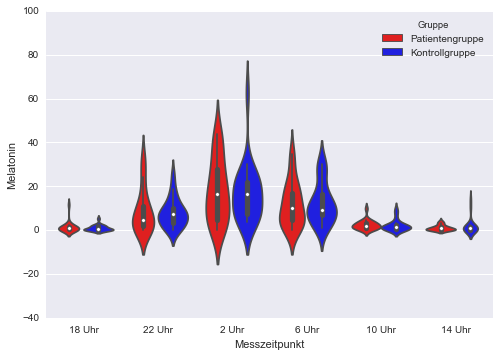

In [6]:
ax = sns.violinplot(data=df, x='Messzeitpunkt', y='Melatonin', hue='Gruppe', split=False, size=25.0, 
                    palette={"Patientengruppe": "#FF0000", "Kontrollgruppe": "#0000FF"},
                    order=['18 Uhr', '22 Uhr', '2 Uhr', '6 Uhr', '10 Uhr', '14 Uhr']) #['2','6','10','14','18','22'])
#ax = sns.stripplot(data=df, x='Messzeitpunkt', y='Melatonin', hue='Gruppe', jitter=True)
fig = ax.get_figure()
sns.set(font_scale=1.5)  # crazy big
fig.savefig('1.png')

In [30]:
np.arange(8,16,2)

array([ 8, 10, 12, 14])

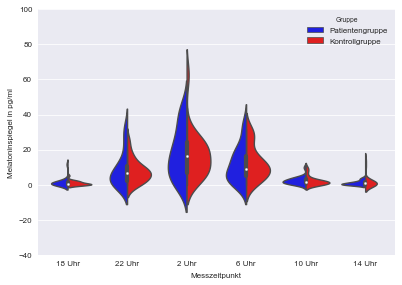

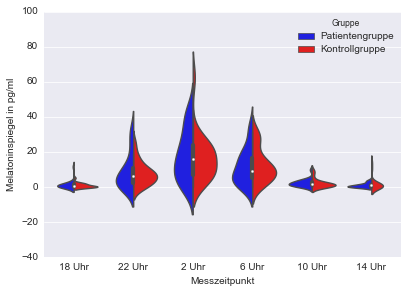

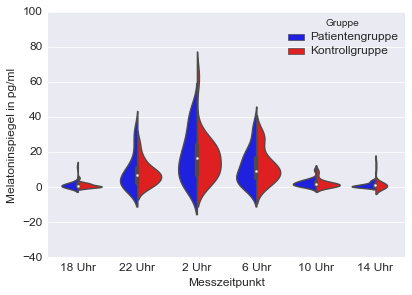

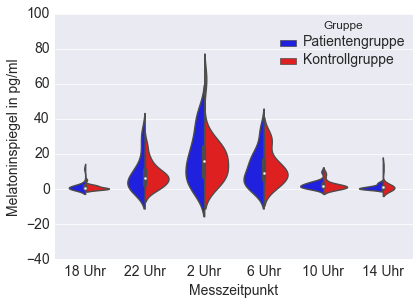

In [33]:
for s in np.arange(8,16,2):
    sns.set_context("paper", rc={"font.size":s,"axes.titlesize":s,"axes.labelsize":s}) 
    ax = sns.violinplot(data=df, x='Messzeitpunkt', y='Melatonin', hue='Gruppe', split=True, size=15.0, aspect=1.5,
                        palette={"Patientengruppe": "#0000FF", "Kontrollgruppe": "#FF0000"},
                        order=['18 Uhr', '22 Uhr', '2 Uhr', '6 Uhr', '10 Uhr', '14 Uhr']) #['2','6','10','14','18','22'])
    ax.set_ylabel('Melatoninspiegel in pg/ml', size=s)
    ax.tick_params(labelsize=s)
    #fig = ax.get_figure()
    #sns.set(font_scale=1.1) 
    #axs.set_ylabel('mylabel')
    
    leg = plt.gca().get_legend()
    ltext  = leg.get_texts()  # all the text.Text instance in the legend
    plt.setp(ltext, fontsize=s)    # the legend text fontsize


    plt.show()

    fig.savefig('violin_{:02d}.png'.format(s), dpi=300)
    

In [8]:
ax = sns.violinplot(data=df, x='Time', y='Melatonin', hue='Group', split=True, size=15.0, color=".8", order=['2','6','10','14','18','22'])
fig = ax.get_figure()
fig.savefig('2.png')

ValueError: Could not interpret input 'Time'

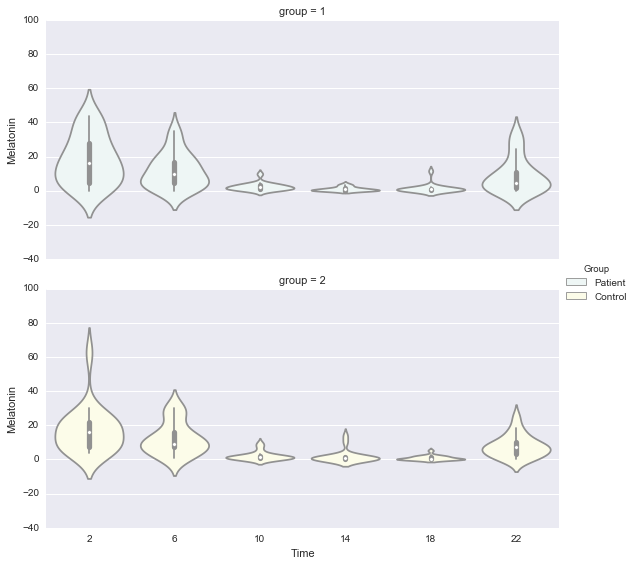

In [9]:
g = sns.FacetGrid(data=df, row="group", hue='Group',  palette='Set3', size=4.0, aspect=2.0)
(g.map(sns.violinplot, 'Time', 'Melatonin', 'Group', c=df['group'], split=False, size=15.0, order=['2','6','10','14','18','22'])
.despine(left=True)
.add_legend(title="Group"))
g.savefig('3.png')

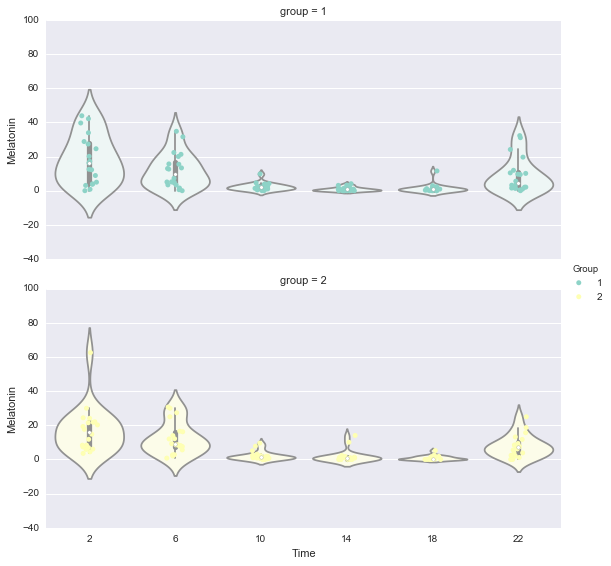

In [10]:
g = sns.FacetGrid(data=df, row="group", hue='group', palette='Set3', size=4.0, aspect=2.0)
(g.map(sns.stripplot, 'Time', 'Melatonin', c=df['group'], order=['2','6','10','14','18','22'], jitter=True))
(g.map(sns.violinplot, 'Time', 'Melatonin', 'Group', c=df['group'], split=False, size=15.0, order=['2','6','10','14','18','22'])
.despine(left=True)
.add_legend(title="Group"))
g.savefig('4.png')